In [2]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from typing import Annotated
# Reducers
from langgraph.graph.message import add_messages

ModuleNotFoundError: No module named 'langgraph'

In [2]:
class State(TypedDict):
    messages : Annotated[list, add_messages]

In [3]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ['GROQ_API_KEY'] = os.getenv('GROQ_API_KEY' )

In [4]:
from langchain_groq import ChatGroq
llm = ChatGroq(model='deepseek-r1-distill-llama-70b')

In [5]:
llm.invoke('hi')

AIMessage(content='<think>\n\n</think>\n\nHello! How can I assist you today? 😊', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 4, 'total_tokens': 20, 'completion_time': 0.094327335, 'prompt_time': 0.000169708, 'queue_time': 0.053536432, 'total_time': 0.094497043}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--e9d57f0e-e104-46ce-a669-a798126fb999-0', usage_metadata={'input_tokens': 4, 'output_tokens': 16, 'total_tokens': 20})

In [6]:
def Superbot(state:State):
    return {'messages':[llm.invoke(state['messages'])]}

In [7]:
graph = StateGraph(State)
graph.add_node('superbot', Superbot)
graph.add_edge(START, 'superbot')
graph.add_edge('superbot', END)

graph_builder  = graph.compile()



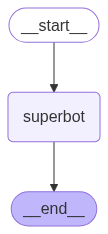

In [8]:
from IPython.display import display, Image
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [9]:
graph_builder.invoke({'messages': "hi, my name is vibhav"})

{'messages': [HumanMessage(content='hi, my name is vibhav', additional_kwargs={}, response_metadata={}, id='5d48d2a8-909e-42d1-9c0f-32616abc4d02'),
  AIMessage(content='<think>\n\n</think>\n\nHi Vibhav! How can I assist you today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 11, 'total_tokens': 28, 'completion_time': 0.102282682, 'prompt_time': 0.000653381, 'queue_time': 0.053841529, 'total_time': 0.102936063}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--45980951-29c5-48de-b701-ff134f5e9415-0', usage_metadata={'input_tokens': 11, 'output_tokens': 17, 'total_tokens': 28})]}

In [10]:
for event in graph_builder.stream({"messages":"Hello My name is vibhav"}):
    print(event)

{'superbot': {'messages': [AIMessage(content='<think>\n\n</think>\n\nHello Vibhav! How can I assist you today? 😊', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 10, 'total_tokens': 29, 'completion_time': 0.098433184, 'prompt_time': 0.000236196, 'queue_time': 0.281118997, 'total_time': 0.09866938}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_87ec4d1ec3', 'finish_reason': 'stop', 'logprobs': None}, id='run--7c62873d-bee6-4d24-9e50-2c050f1b7c4c-0', usage_metadata={'input_tokens': 10, 'output_tokens': 19, 'total_tokens': 29})]}}
